In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
# Load the dataset dataset_5secondWindow.csv

df = pd.read_csv('dataset_5secondWindow.csv', index_col=0)
df

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,16170,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,15871,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,16811,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,15831,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,876,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,14125,4.0,NaN,100.0,10.066610,4.564648,13.414389,3.373972,0.986319,0.974523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,U2
5889,19582,32.0,NaN,10.0,9.964271,8.768007,11.454213,0.665529,0.648602,0.648343,...,NaN,NaN,NaN,NaN,31.960054,31.960054,31.960054,NaN,Train,U3
5890,16178,86.0,NaN,100.0,9.812893,9.772881,9.862587,0.017633,0.024392,0.024081,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
5891,10973,199.0,NaN,100.0,9.831144,9.807347,9.874450,0.013485,0.481212,0.481209,...,NaN,NaN,NaN,NaN,1.090415,1.090415,1.090415,NaN,Still,U10


In [5]:
# Make a copy of the main dataset

df_copy = df.copy()
df_copy.head()

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,16170,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,15871,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,16811,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,15831,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,876,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1


In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5893 entries, 0 to 5892
Data columns (total 70 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               5893 non-null   int64  
 1   time                                             5893 non-null   float64
 2   activityrecognition#0                            0 non-null      float64
 3   activityrecognition#1                            5893 non-null   float64
 4   android.sensor.accelerometer#mean                5893 non-null   float64
 5   android.sensor.accelerometer#min                 5893 non-null   float64
 6   android.sensor.accelerometer#max                 5893 non-null   float64
 7   android.sensor.accelerometer#std                 5893 non-null   float64
 8   android.sensor.game_rotation_vector#mean         5094 non-null   float64
 9   android.sensor.game_rotation_v

In [7]:
df_copy.columns

Index(['id', 'time', 'activityrecognition#0', 'activityrecognition#1',
       'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min',
       'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.gravity#mean', 'android.sensor.gravity#min',
       'android.sensor.gravity#max', 'android.sensor.gravity#std',
       'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'android.sensor.light#mean', 'android.sensor.light#min',
       'android.se

In [8]:
df_copy.isnull().sum().sort_values(ascending=False).head(45)

activityrecognition#0                              5893
android.sensor.step_counter#std                    5661
android.sensor.proximity#std                       5610
android.sensor.proximity#max                       4774
android.sensor.proximity#mean                      4774
android.sensor.proximity#min                       4774
android.sensor.pressure#std                        4765
speed#std                                          4575
android.sensor.step_counter#mean                   4406
android.sensor.step_counter#min                    4406
android.sensor.step_counter#max                    4406
android.sensor.pressure#min                        3975
android.sensor.pressure#max                        3975
android.sensor.pressure#mean                       3975
android.sensor.light#std                           3769
speed#mean                                         2373
speed#min                                          2373
speed#max                                       

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (70).

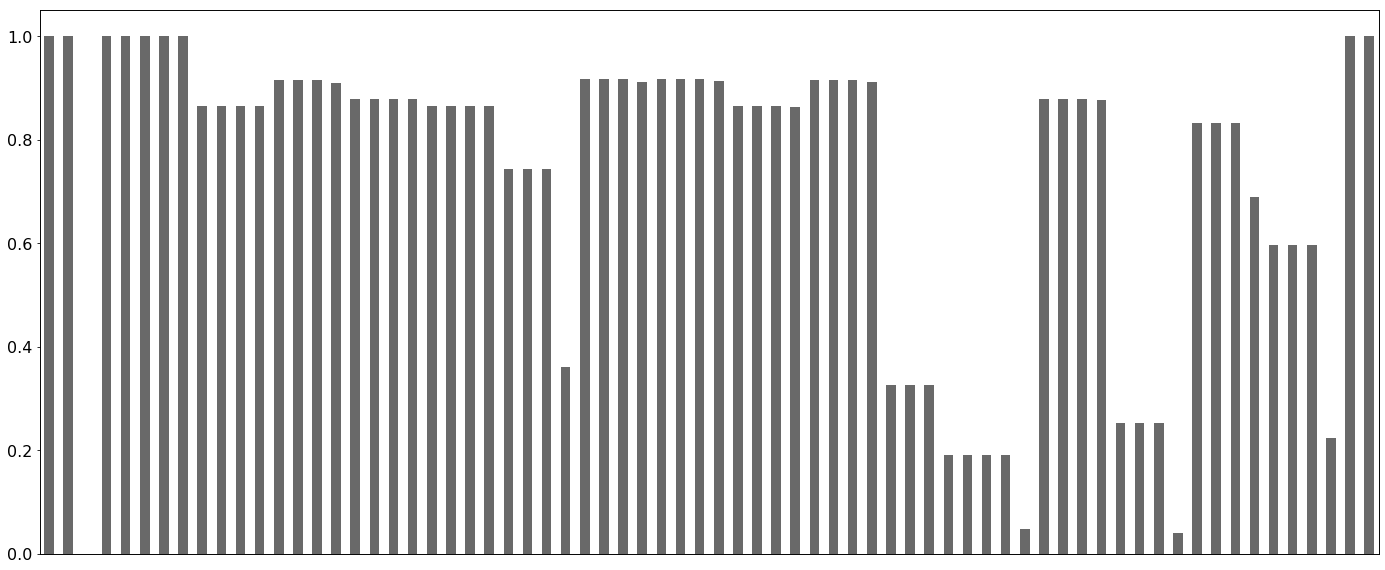

In [9]:
# Gives a bar chart of the missing values

msno.bar(df_copy)

<Figure size 7200x4320 with 0 Axes>

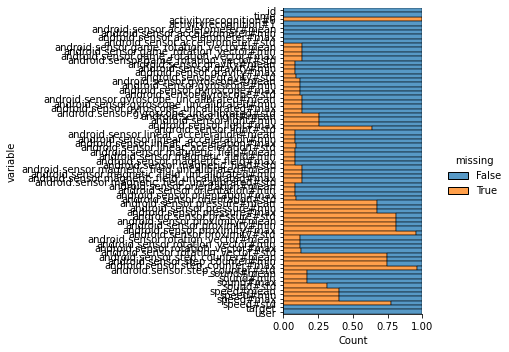

In [22]:
plt.figure(figsize=(100,60))
sns.displot(
    data=df_copy.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.jpg", dpi=150)

<AxesSubplot:>

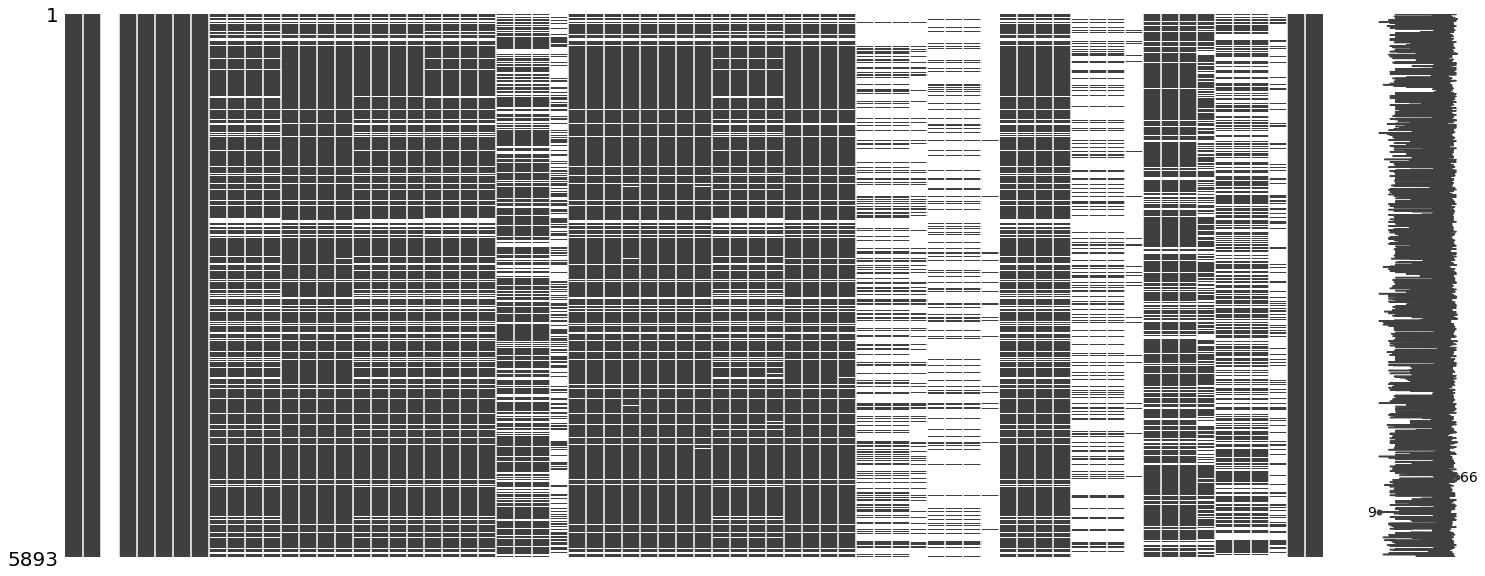

In [10]:
# Gives positional information of the missing values

msno.matrix(df_copy)

<AxesSubplot:>

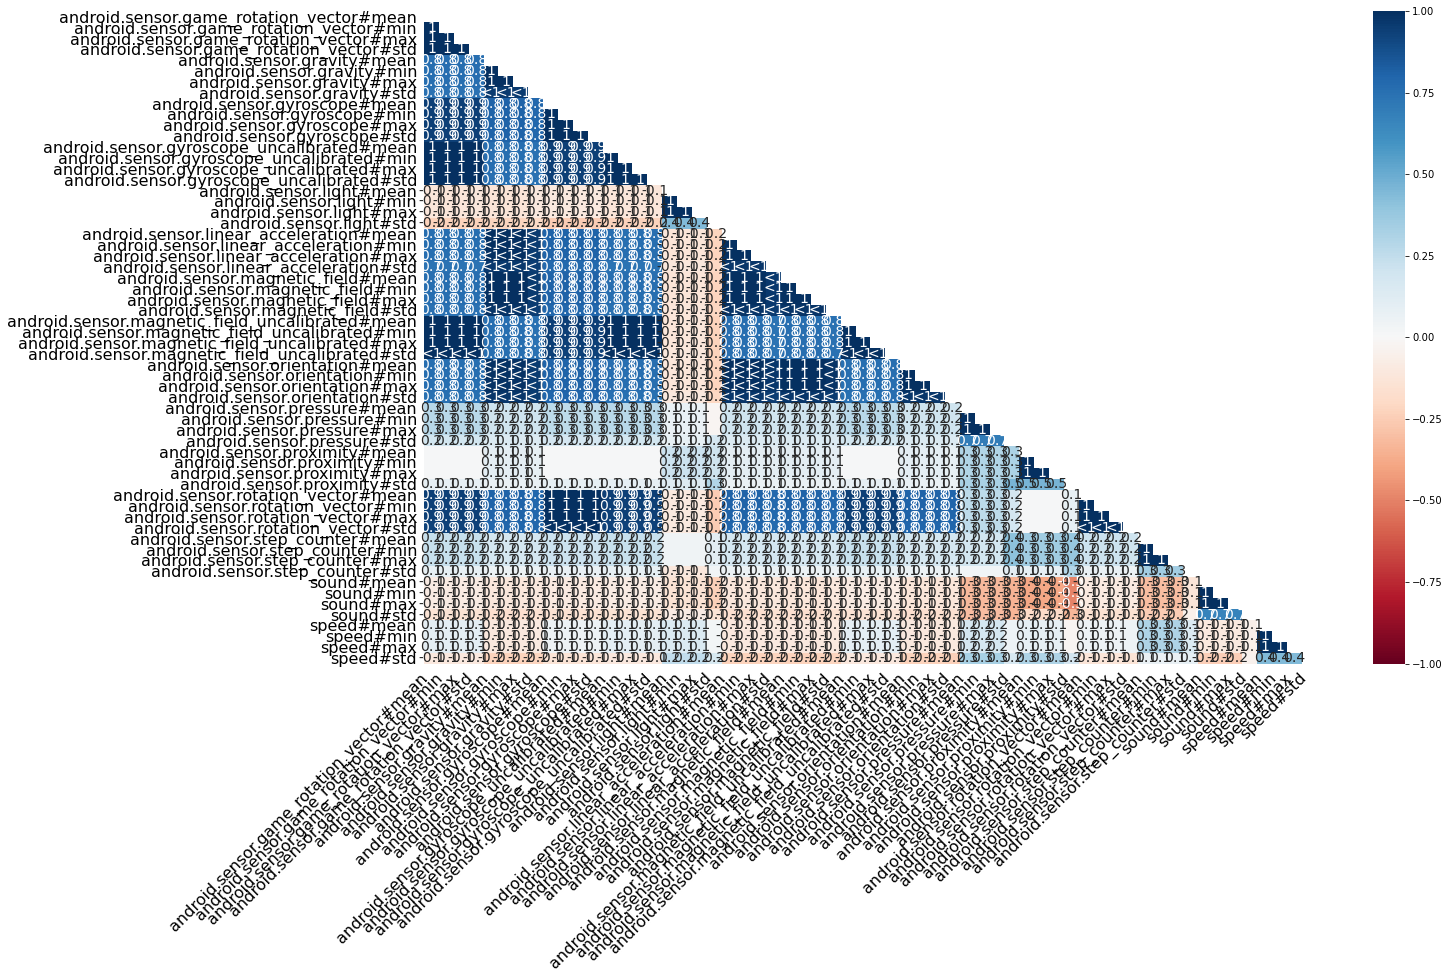

In [11]:
# Gives a heatmap of how missing values are related

msno.heatmap(df_copy)

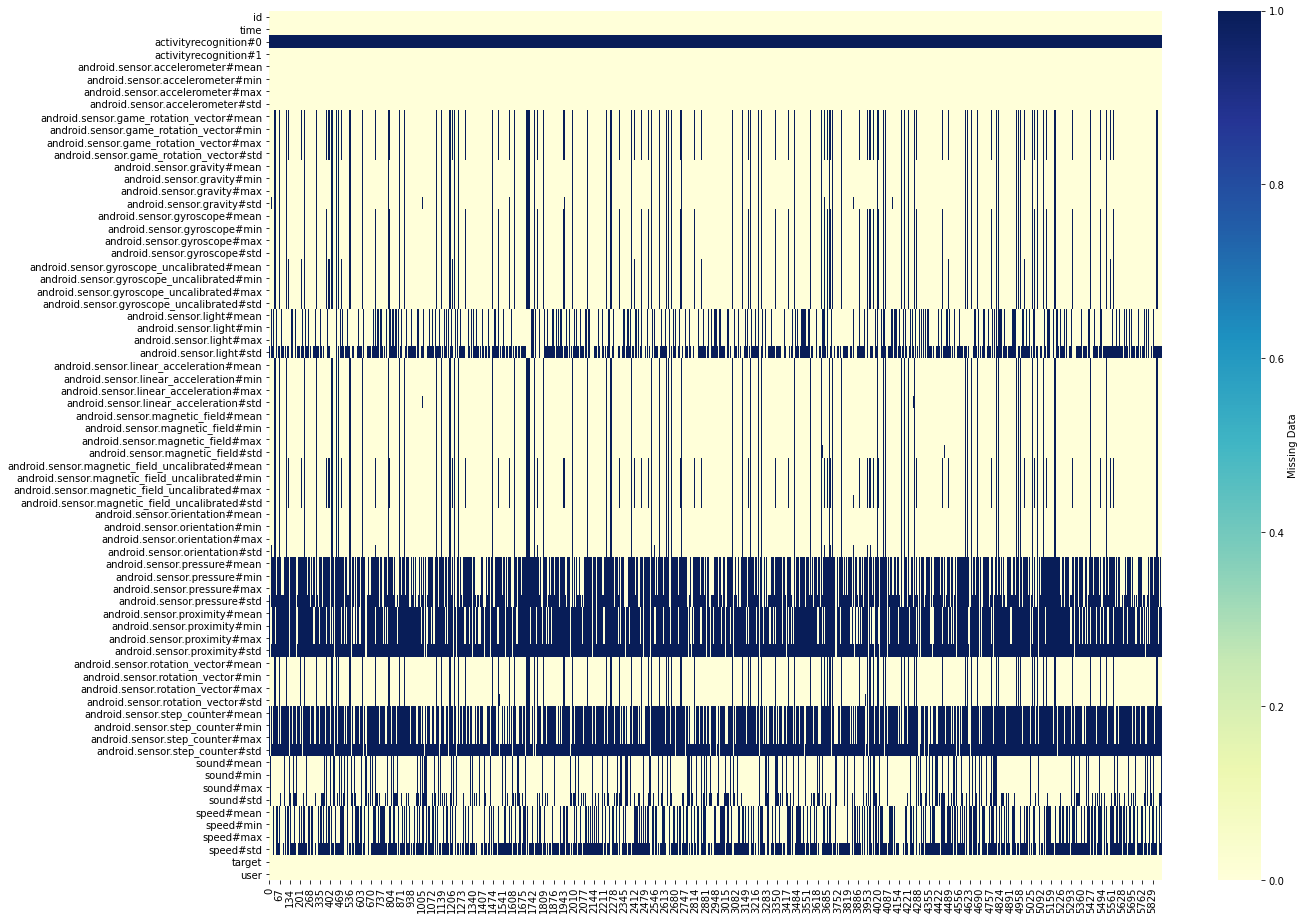

In [13]:
plt.figure(figsize=(20,16))
sns.heatmap(df_copy.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [ ]:
df_copy['user'].value_counts()

U1     2470
U12     820
U10     531
U7      397
U3      331
U6      279
U2      271
U4      227
U8      214
U11     167
U13      90
U9       79
U5       17
Name: user, dtype: int64

In [ ]:
df_copy['target'].value_counts()

Car        1180
Still      1179
Train      1179
Bus        1178
Walking    1177
Name: target, dtype: int64

c:\Users\andre\anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user', ylabel='count'>

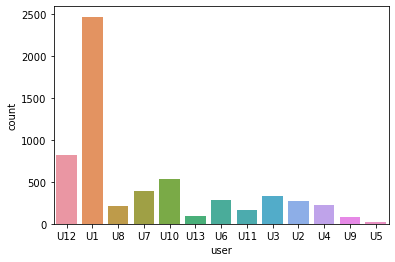

In [ ]:
sns.countplot(df_copy['user'])

In [ ]:
df1 = df_copy.groupby(['user'])[['target']].count()
df1

,target
user,
U1,2470
U10,531
U11,167
U12,820
U13,90
U2,271
U3,331
U4,227
U5,17


In [ ]:
df2 = df_copy.groupby(['target'])[['user']].count()
df2

,user
target,
Bus,1178
Car,1180
Still,1179
Train,1179
Walking,1177


In [ ]:
df3 = df_copy.groupby(['user', 'target'], as_index=False).count()
df3

,user,target,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,...,android.sensor.step_counter#max,android.sensor.step_counter#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std
0,U1,Bus,619,619,0,619,619,619,619,619,...,0,0,609,609,609,476,331,331,331,0
1,U1,Car,419,419,0,419,419,419,419,419,...,0,0,328,328,328,274,384,384,384,50
2,U1,Still,350,350,0,350,350,350,350,350,...,0,0,350,350,350,314,0,0,0,0
3,U1,Train,624,624,0,624,624,624,624,624,...,0,0,624,624,624,541,0,0,0,0
4,U1,Walking,458,458,0,458,458,458,458,458,...,440,118,458,458,458,363,414,414,414,14
5,U10,Car,97,97,0,97,97,97,97,97,...,30,0,64,64,64,48,87,87,87,28
6,U10,Still,397,397,0,397,397,397,397,397,...,273,0,317,317,317,313,365,365,365,60
7,U10,Walking,37,37,0,37,37,37,37,37,...,27,21,19,19,19,16,20,20,20,7
8,U11,Car,167,167,0,167,167,167,167,167,...,14,0,121,121,121,121,166,166,166,105
9,U12,Bus,168,168,0,168,168,168,168,168,...,168,43,0,0,0,0,51,51,51,51


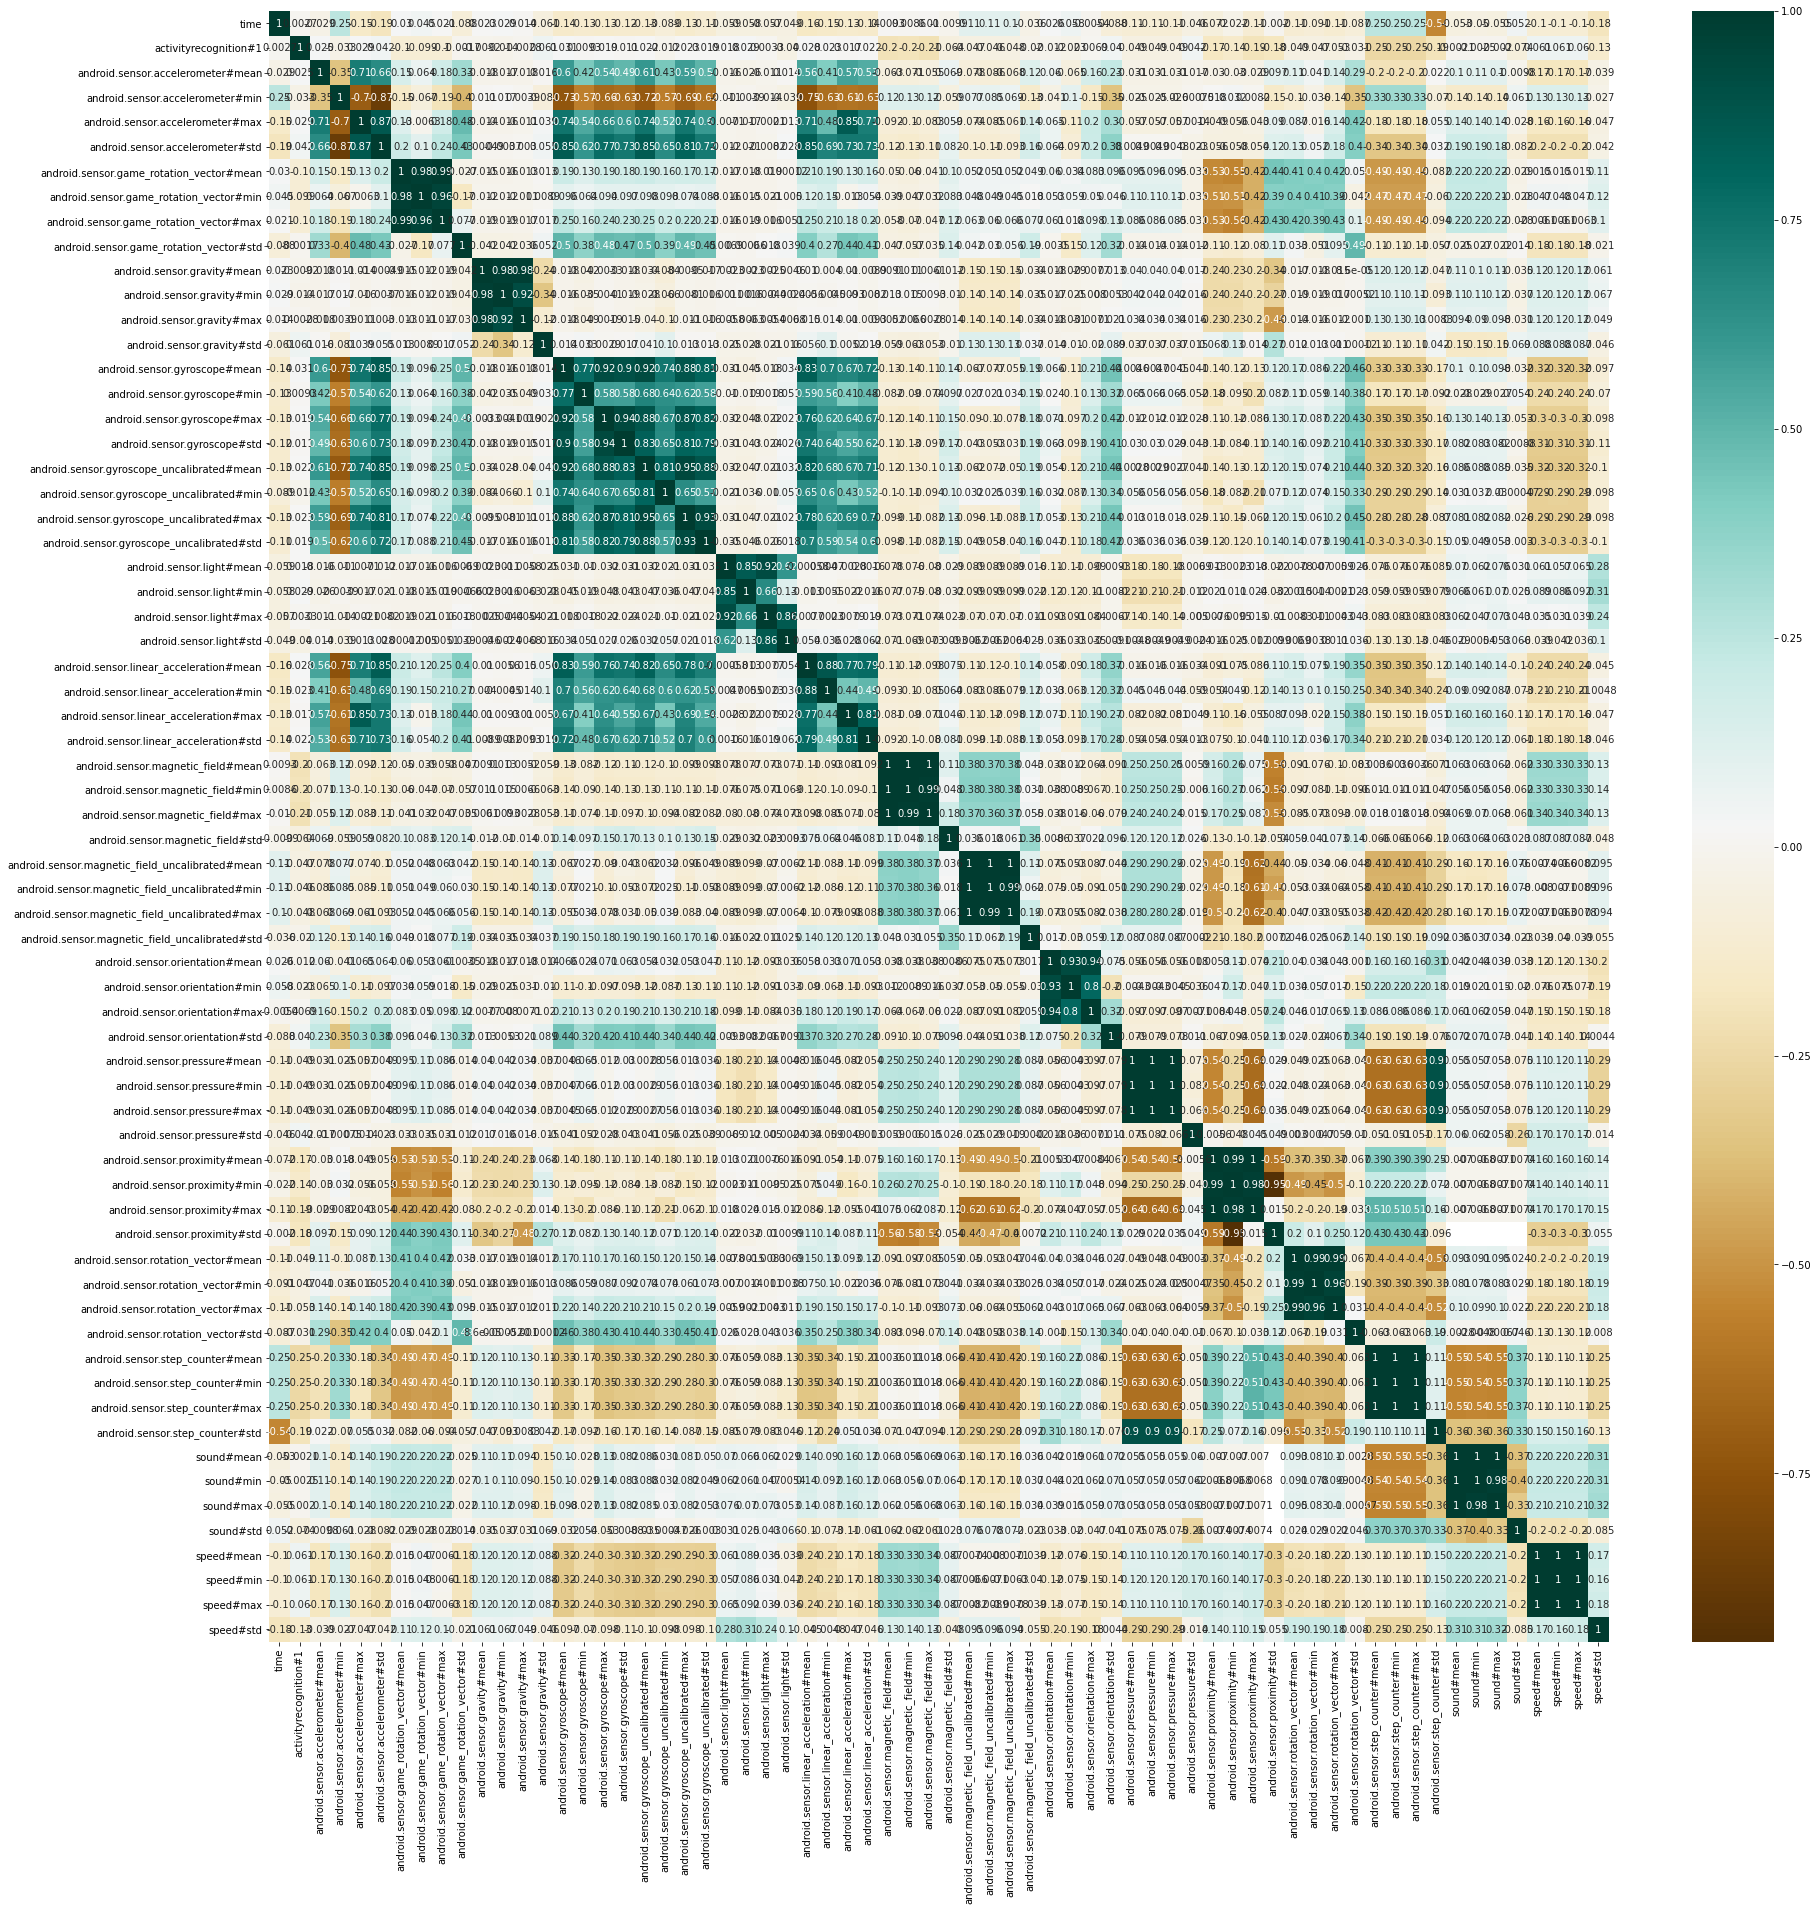

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
ax = sns.heatmap((df_copy.drop(['target', 'user', 'id', 'activityrecognition#0'], axis=1)).corr(), cmap= 'BrBG',annot=True)